# 17 — Annotations, Text, and Math (LaTeX-like)

## Goal
Add clear labels, callouts, arrows, and math-style text to explain insights directly on the plot.

### What you'll learn
- `ax.text()` vs `ax.annotate()`
- Arrow styles and annotation boxes
- Coordinate systems: data, axes-fraction, figure-fraction
- Multi-line text and alignment
- Math text (Matplotlib mathtext) and best practices


In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
np.random.seed(42)
print('✅ Setup complete')

✅ Setup complete


## 1. Basic Text

```python
ax.text(x, y, 'Label', fontsize=12, ha='center', va='bottom')
```
Use `transform=ax.transAxes` to position text in axes coordinates (0–1).

```python
ax.text(0.02, 0.95, 'Top-left note', transform=ax.transAxes)
```


=== TEXT POSITIONING (DATA vs AXES COORDS) ===


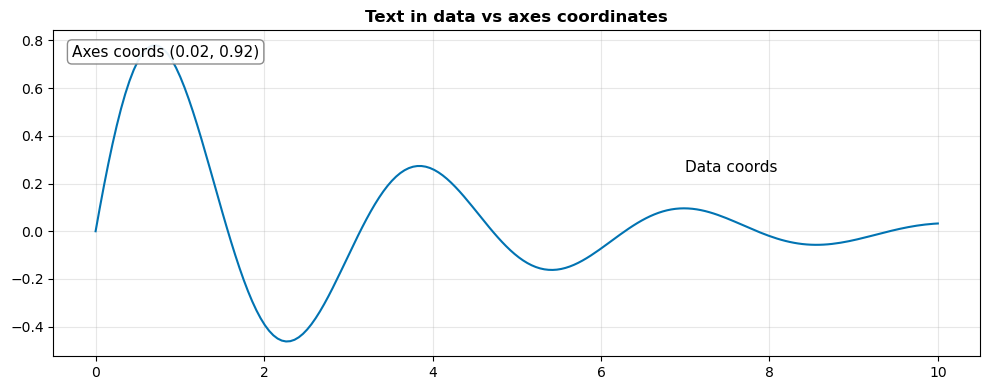

In [2]:
print('=== TEXT POSITIONING (DATA vs AXES COORDS) ===')
x = np.linspace(0, 10, 200)
y = np.exp(-x/3) * np.sin(2*x)

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x, y, color='#0173B2')
ax.set_title('Text in data vs axes coordinates', fontweight='bold')
ax.grid(True, alpha=0.3)

# Data coordinates
ax.text(7.0, 0.25, 'Data coords', fontsize=11, color='black')

# Axes coordinates (relative)
ax.text(0.02, 0.92, 'Axes coords (0.02, 0.92)', transform=ax.transAxes,
        fontsize=11, bbox=dict(boxstyle='round', fc='white', ec='0.5', alpha=0.9))

plt.tight_layout()
plt.show()

## 2. Annotations with Arrows

`annotate()` is built for callouts: text + arrow + control over positioning.

```python
ax.annotate('Peak', xy=(x0, y0), xytext=(x1, y1),
            arrowprops={'arrowstyle': '->'})
```

### Useful arrow styles
- `'->'`, `'-|>'`, `'<->'`
- curved arrows via `connectionstyle='arc3,rad=0.2'`

### Annotation boxes
Use `bbox={...}` to make text readable on busy backgrounds.


=== ANNOTATIONS (ARROWS + BOXES) ===


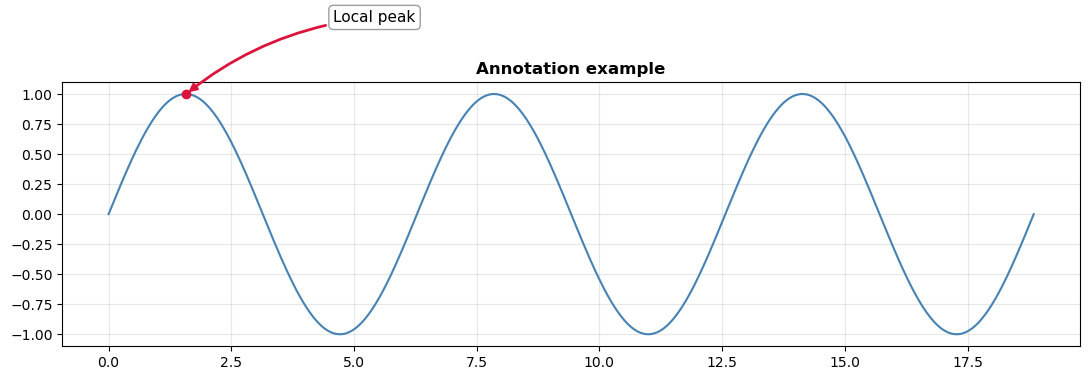

In [3]:
print('=== ANNOTATIONS (ARROWS + BOXES) ===')
x = np.linspace(0, 6*np.pi, 800)
y = np.sin(x)

# Find a peak location
idx = np.argmax(y[:200])
x0, y0 = x[idx], y[idx]

fig, ax = plt.subplots(figsize=(11, 4))
ax.plot(x, y, color='steelblue')
ax.scatter([x0], [y0], color='crimson', zorder=5)

ax.annotate('Local peak',
            xy=(x0, y0),
            xytext=(x0 + 3, y0 + 0.6),
            arrowprops=dict(arrowstyle='-|>', color='crimson', lw=2,
                            connectionstyle='arc3,rad=0.15'),
            bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='0.6', alpha=0.95),
            fontsize=11)

ax.set_title('Annotation example', fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 3. Math Text (no external LaTeX required)

Matplotlib supports math-style text using *mathtext*. Examples:

```python
ax.set_title(r'Gaussian: $\mu=0, \sigma=1$')
ax.text(0.05, 0.9, r'$y = \sin(x)$', transform=ax.transAxes)
```

### Best practice
- Use raw strings `r'...'` for math text.
- Keep equations short inside plots; put long derivations in captions/report text.


=== MATH TEXT DEMO ===


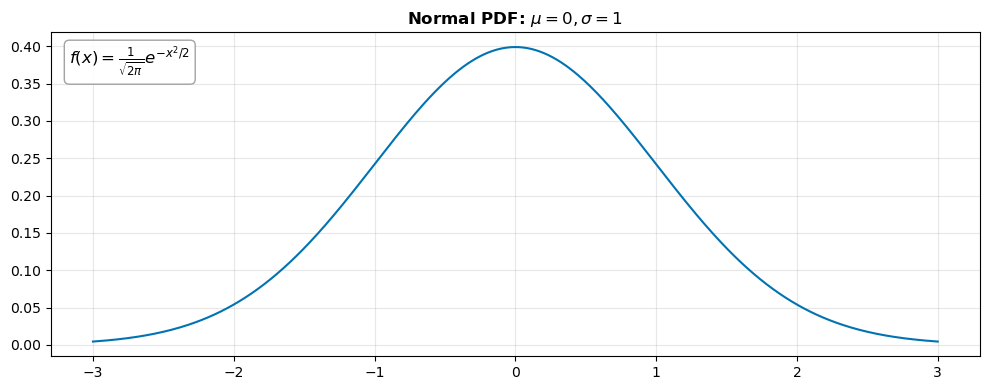

In [4]:
print('=== MATH TEXT DEMO ===')
x = np.linspace(-3, 3, 400)
y = (1/np.sqrt(2*np.pi)) * np.exp(-0.5*x**2)

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x, y, color='#0173B2')
ax.set_title(r'Normal PDF: $\mu=0, \sigma=1$', fontweight='bold')
ax.text(0.02, 0.9, r'$f(x)=\frac{1}{\sqrt{2\pi}}e^{-x^2/2}$',
        transform=ax.transAxes, fontsize=12,
        bbox=dict(boxstyle='round', fc='white', ec='0.6', alpha=0.9))
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 4. Common Annotation Patterns

- **Reference lines**: `ax.axhline`, `ax.axvline` + text label.
- **Event markers**: vertical line + arrow + description.
- **Highlight regions**: `ax.axvspan` or `ax.fill_between` and label.

## Practice
1. Annotate maximum and minimum points on a curve.
2. Add a shaded region for a threshold (e.g., bad zone) and label it.
3. Use axes coordinates to place a permanent note/branding.
4. Add mathtext for a fitted line equation.

## Quick reference
```python
ax.text(0.02, 0.95, 'Note', transform=ax.transAxes)
ax.annotate('Peak', xy=(x0,y0), xytext=(x1,y1), arrowprops={'arrowstyle':'->'})
ax.axvspan(a, b, alpha=0.2)
```
